#📌 Extracción

In [2]:
import pandas as pd

In [3]:
datos = pd.read_json('/content/TelecomX_Data (1).json')

In [4]:
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
datos.shape

(7267, 6)

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [7]:
datos.isna().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [8]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [9]:
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

datos_unido = pd.concat([datos[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

# verificando datos duplicados
print(datos_unido.duplicated().sum())

0


In [10]:
customerID = datos['customerID']
Churn = datos['Churn']

#🔧 Transformación

In [11]:
datos = pd.concat([customerID, Churn, customer_df, phone_df, internet_df, account_df], axis=1)

datos.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
820,1163-VIPRI,No,Female,0,Yes,Yes,65,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.30,7337.55
378,0537-QYZZN,No,Male,1,Yes,Yes,24,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,79.85,1857.75
2836,3934-HXCFZ,Yes,Male,0,Yes,No,23,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,99.25,2186.4
173,0270-THENM,No,Male,0,Yes,Yes,72,Yes,Yes,DSL,...,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),69.85,5102.35
858,1216-BGTSP,No,Male,0,No,No,45,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),108.45,4964.7
6923,9537-VHDTA,No,Female,0,No,Yes,1,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,No,Mailed check,51.20,51.2
2226,3097-PYWXL,No,Female,0,Yes,Yes,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.95,82.9
4467,6127-ISGTU,Yes,Female,0,Yes,No,16,Yes,Yes,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.95,1378.25
6651,9139-TWBAS,No,Female,0,Yes,No,26,No,No phone service,DSL,...,Yes,Yes,No,Yes,No,One year,No,Bank transfer (automatic),47.85,1190.5
5231,7134-MJPDY,No,Female,1,No,No,66,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),102.85,6976.75


In [12]:
datos.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [13]:
datos['Charges.Total'] = pd.to_numeric(datos['Charges.Total'], errors='coerce')
print(datos['Charges.Total'].apply(type).value_counts())
print(datos['Charges.Total'].isna().sum())

Charges.Total
<class 'float'>    7267
Name: count, dtype: int64
11


In [14]:
datos["Cuentas_Diarias"] = datos["Charges.Monthly"] / 30

In [15]:
datos.loc[:,"Cuentas_Diarias"] = pd.to_numeric(datos["Cuentas_Diarias"], errors="coerce")

In [16]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [17]:
blancos = datos[datos["Churn"].isna() | (datos["Churn"].str.strip() == "")]
print(blancos)

      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
30    0047-ZHDTW        Female              0      No         No      11   
75    0120-YZLQA          Male              0      No         No      71   
96    0154-QYHJU          Male              0      No         No      29   
98    0162-RZGMZ        Female              1      No         No       5   
175   0274-VVQOQ          Male              1     Yes         No      65   
...          ...   ...     ...            ...     ...        ...     ...   
7158  9840-GSRFX        Female              0      No         No      14   
7180  9872-RZQQB        Female              0     Yes         No      49   
7211  9920-GNDMB          Male              0      No         No       9   
7239  9955-RVWSC        Female              0     Yes        Yes      67   
7247  9966-VYRTZ        Female              0     Yes        Yes      31   

     PhoneService     MultipleLines InternetService  ...     DeviceProtection  \
30    

In [18]:
## MANUPILANDO VARIABLE CHURN

In [19]:
datos = datos[~(datos["Churn"].isna() | (datos["Churn"].str.strip() == ""))]

In [20]:
print(datos["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [21]:
print(datos["Churn"].unique())

['No' 'Yes']


In [22]:
datos.loc[:,"Churn"] = datos["Churn"].str.strip().str.lower()


In [23]:
datos.loc[:, "Churn_bin"] = datos["Churn"].map({"yes": 1, "no": 0})

In [24]:
print(datos["Churn_bin"].value_counts(dropna=False))

Churn_bin
0    5174
1    1869
Name: count, dtype: int64


#📊 Carga y análisis

In [25]:
datos.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,Churn_bin
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723,0.265370
std,0.368612,24.559481,30.090047,2266.771362,1.003002,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.608333,0.000000
25%,0.000000,9.000000,35.500000,401.450000,1.183333,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,2.345000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,3.958333,1.000000


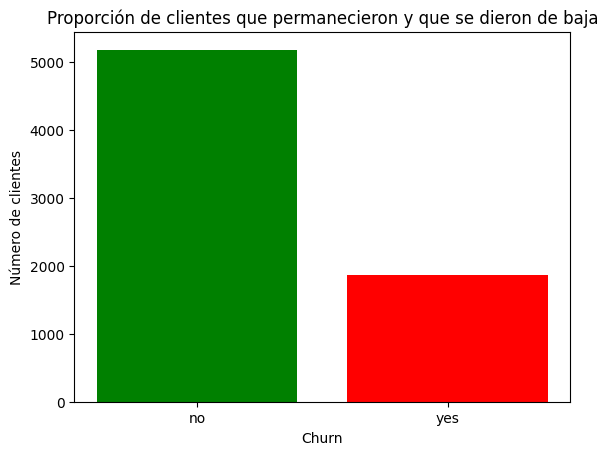

In [26]:
import matplotlib.pyplot as plt

conteo = datos["Churn"].value_counts()

plt.bar(conteo.index, conteo.values, color=["green", "red"])
plt.title("Proporción de clientes que permanecieron y que se dieron de baja")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.show()


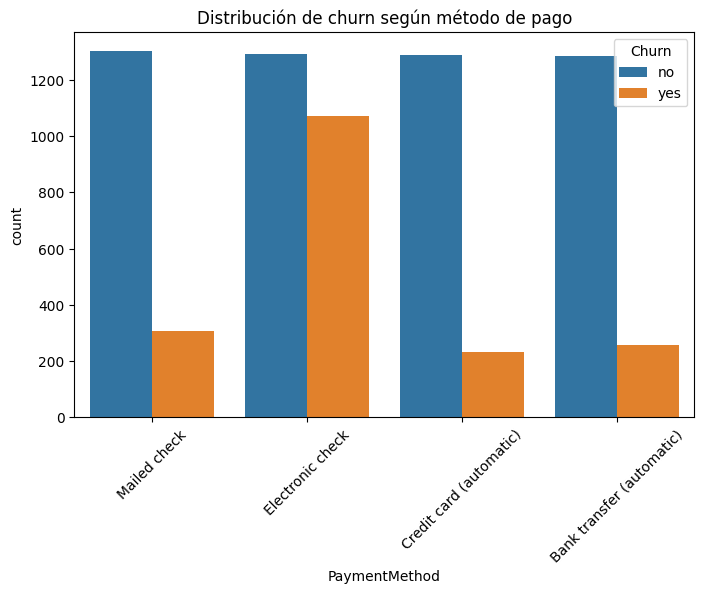

In [27]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=datos, x="PaymentMethod", hue="Churn")
plt.title("Distribución de churn según método de pago")
plt.xticks(rotation=45)
plt.show()

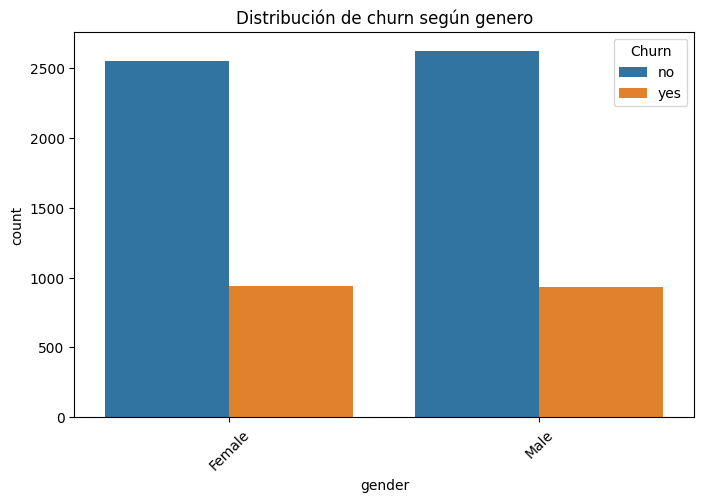

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data=datos, x="gender", hue="Churn")
plt.title("Distribución de churn según genero")
plt.xticks(rotation=45)
plt.show()

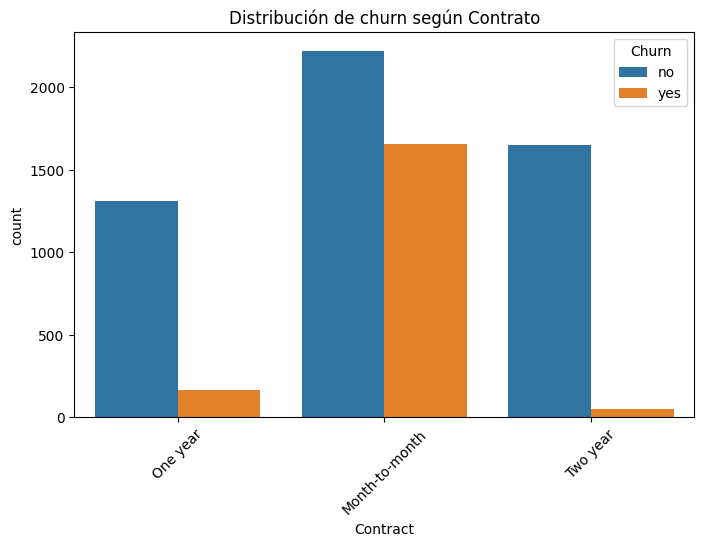

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(data=datos, x="Contract", hue="Churn")
plt.title("Distribución de churn según Contrato")
plt.xticks(rotation=45)
plt.show()

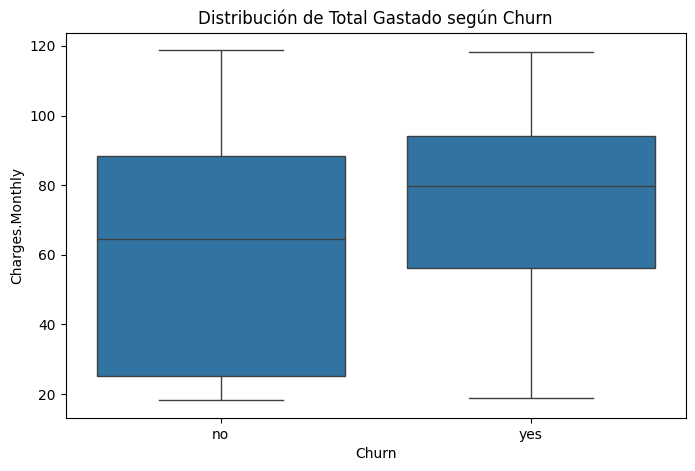

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=datos, x="Churn", y="Charges.Monthly")
plt.title("Distribución de Total Gastado según Churn")
plt.show()


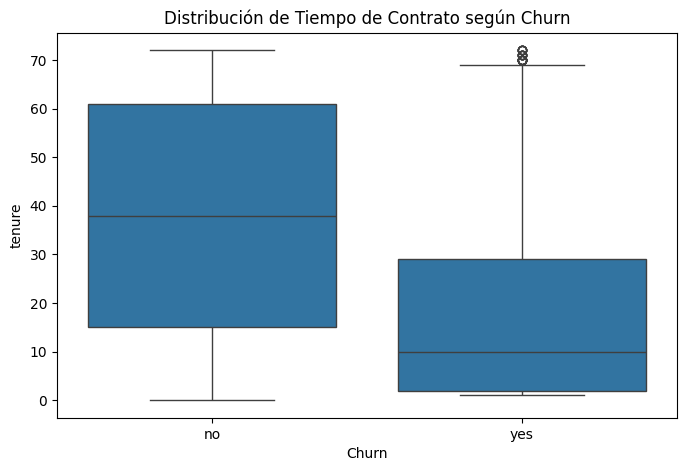

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(data=datos, x="Churn", y="tenure")
plt.title("Distribución de Tiempo de Contrato según Churn")
plt.show()

In [32]:
datos.loc[:, "Churn_bin"] = datos["Churn"].map({"yes": 1, "no": 0})

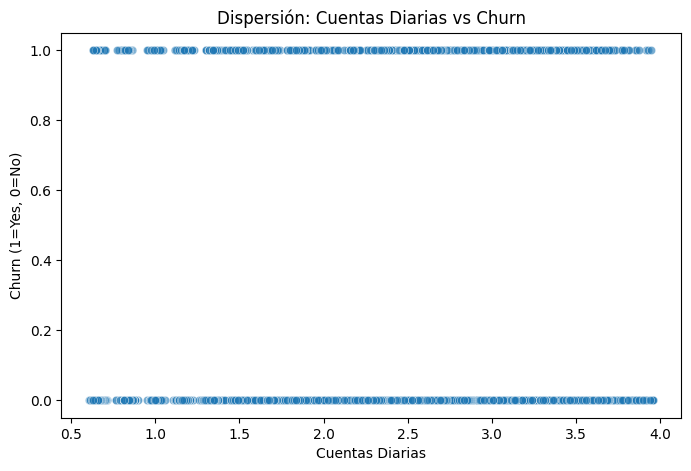

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=datos, x="Cuentas_Diarias", y="Churn_bin", alpha=0.6)
plt.title("Dispersión: Cuentas Diarias vs Churn")
plt.xlabel("Cuentas Diarias")
plt.ylabel("Churn (1=Yes, 0=No)")
plt.show()

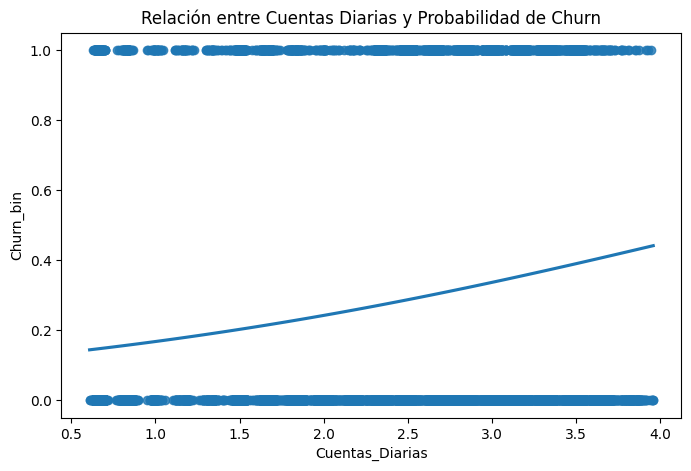

In [34]:
plt.figure(figsize=(8,5))
sns.regplot(data=datos, x="Cuentas_Diarias", y="Churn_bin", logistic=True, ci=None)
plt.title("Relación entre Cuentas Diarias y Probabilidad de Churn")
plt.show()

In [35]:
pip install plotly

In [36]:
import plotly.express as px
fig = px.scatter(
    datos,
    x="Cuentas_Diarias",
    y="Churn_bin",
    color="Churn_bin",
    labels={"Churn_bin": "Churn (1=Yes, 0=No)"},
    title="Dispersión interactiva: Cuentas Diarias vs Churn",
    hover_data=["Cuentas_Diarias"]
)


fig = px.scatter(
    datos,
    x="Cuentas_Diarias",
    y="Churn_bin",
    trendline="ols",
    color="Churn_bin",
    labels={"Churn_bin": "Churn (1=Yes, 0=No)"},
    title="Dispersión interactiva con línea de regresión"
)

fig.show()

#📄Informe final

En base al analisis realizado, podemos notar que los factores mas relevantes para explicar la salida de clientes de la empresa a la que estamos evaluando son los siguientes:
Los clientes que poseen contrato mensual (mes a mes) son los que tienen mayor cantidad de salidas, pero estos clientes tambien representan la mayor proporcion de clientes que no abandonan la compania, es decir representa las dos mayorias en cantidad de clientes, la mayoria de clientes salientes en contratos mensuales tambien podemos confirmarlo en el grafico Distribución de Tiempo de Contrato según Churn , que nos muestra una media de 10 meses desde que el cliente inicia su contrato hasta que abandona la compania.
El otro factor relevante es la facturacion o gasto mensual del cliente, los clientes que gastan mas son los mas propensos a abandonar la compania.
Algunos puntos de accion podrian ser los siguientes:
- Promocionar contratos anuales a un precio especial , para asi generar mas contratos a largo plazo y disminuir los mensuales.
- Crear un club de membresia, en el que a los clientes que lleven mas tiempo en la compania se les ofrezcan productos y ofertas especiales.
- Tener buen feedback de los clientes para conocer el motivo por el cual estarian pensando abandonar la compania.


**PARTE II**

In [37]:
datos = datos.drop(columns=["customerID"])

In [38]:
datos["Charges.Total"] = pd.to_numeric(datos["Charges.Total"], errors="coerce")
print(datos.dtypes)

Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
Cuentas_Diarias     float64
Churn_bin             int64
dtype: object


In [39]:
X = datos.drop(columns=["Churn"])  # variables predictoras
y = datos["Churn"].map({"yes": 1, "no": 0})  # variable objetivo (binaria)

In [40]:
cat_cols = X.select_dtypes(include="object").columns
print("Columnas categóricas:", cat_cols.tolist())

Columnas categóricas: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [41]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [42]:
print(X_encoded.head())
print(X_encoded.shape)

   SeniorCitizen  tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias  \
0              0       9             65.6         593.30         2.186667   
1              0       9             59.9         542.40         1.996667   
2              0       4             73.9         280.85         2.463333   
3              1      13             98.0        1237.85         3.266667   
4              1       3             83.9         267.40         2.796667   

   Churn_bin  gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0          0        False         True            True              True  ...   
1          0         True        False           False              True  ...   
2          1         True        False           False              True  ...   
3          1         True         True           False              True  ...   
4          1        False         True           False              True  ...   

   StreamingTV_No internet service  StreamingTV_Ye

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [44]:
##Revision de balance de clases

In [45]:
conteo = datos["Churn"].value_counts()
print(conteo)


Churn
no     5174
yes    1869
Name: count, dtype: int64


In [46]:
proporcion = datos["Churn"].value_counts(normalize=True) * 100
print(proporcion)

Churn
no     73.463013
yes    26.536987
Name: proportion, dtype: float64


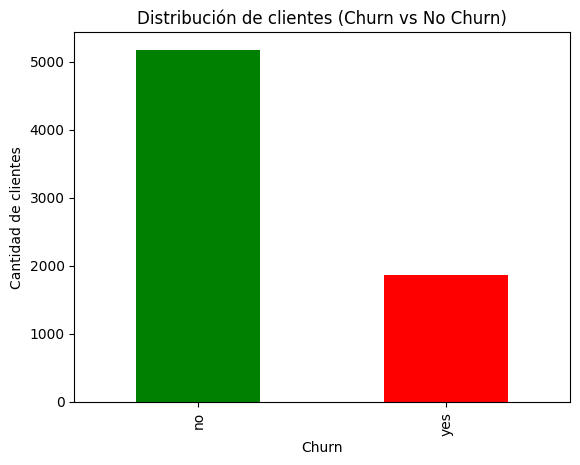

In [47]:
import matplotlib.pyplot as plt

conteo.plot(kind="bar", color=["green", "red"])
plt.title("Distribución de clientes (Churn vs No Churn)")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Churn")
plt.show()

In [48]:
##Balanceo de clases

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [51]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


X_encoded_cleaned = X_encoded.dropna()
y_cleaned = y.loc[X_encoded_cleaned.index]


X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_encoded_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned
)

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train_cleaned, y_train_cleaned)

print("Antes del oversampling:", y_train_cleaned.value_counts(normalize=True))
print("Después del oversampling:", y_train_over.value_counts(normalize=True))

Antes del oversampling: Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64
Después del oversampling: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [52]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print("Antes del undersampling:", y_train.value_counts(normalize=True))
print("Después del undersampling:", y_train_under.value_counts(normalize=True))

Antes del undersampling: Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Después del undersampling: Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


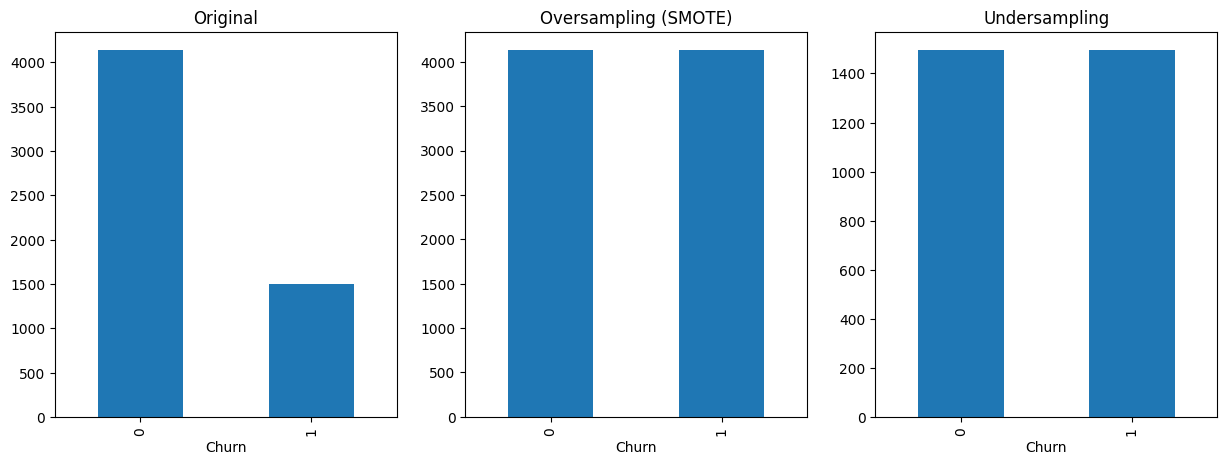

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15,5))

y_train.value_counts().plot(kind="bar", ax=ax[0], title="Original")
y_train_over.value_counts().plot(kind="bar", ax=ax[1], title="Oversampling (SMOTE)")
y_train_under.value_counts().plot(kind="bar", ax=ax[2], title="Undersampling")

plt.show()

In [54]:
## Estandarizacion

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Columnas categóricas y numéricas
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

# Create a pipeline for numerical columns including imputation and scaling
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Impute missing values with the mean
    ('scaler', StandardScaler()) # Scale numerical features
])


# Transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),     # Apply the numerical pipeline
        ("cat", OneHotEncoder(handle_unknown='ignore', drop="first"), cat_cols)  # One-hot categóricas
    ]
)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

results = {}

for name, model in models.items():
    # Pipeline completo
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    # Entrenamiento
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Métricas
    print(f"\n📌 Modelo: {name}")
    print(classification_report(y_test, y_pred, target_names=["No churn", "Churn"]))

    results[name] = pipe


📌 Modelo: Logistic Regression
              precision    recall  f1-score   support

    No churn       1.00      1.00      1.00      1035
       Churn       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


📌 Modelo: KNN
              precision    recall  f1-score   support

    No churn       1.00      1.00      1.00      1035
       Churn       1.00      0.99      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


📌 Modelo: Random Forest
              precision    recall  f1-score   support

    No churn       1.00      1.00      1.00      1035
       Churn       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
wei

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[00:26:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




In [ ]:
##los resultados no estan siendo confiables, asi que corregiremos eliminando la columna que nos esta arrojando el error

In [60]:
datos_encoded = preprocessor.fit_transform(X)  # solo para ver

import pandas as pd
datos_encoded_df = pd.DataFrame(datos_encoded.toarray() if hasattr(datos_encoded, "toarray") else datos_encoded)
datos_encoded_df["Churn"] = y.values

corr = datos_encoded_df.corr()["Churn"].sort_values(ascending=False)
print(corr.head(15))

Churn    1.000000
5        1.000000
12       0.308020
30       0.301919
4        0.193356
2        0.193356
28       0.191825
0        0.150889
23       0.063228
25       0.061382
11       0.040102
9        0.011942
6       -0.008612
10      -0.011942
19      -0.066160
Name: Churn, dtype: float64


In [61]:
corr = datos_encoded_df.corr()["Churn"].sort_values(ascending=False)
print(corr.head(20))

Churn    1.000000
5        1.000000
12       0.308020
30       0.301919
4        0.193356
2        0.193356
28       0.191825
0        0.150889
23       0.063228
25       0.061382
11       0.040102
9        0.011942
6       -0.008612
10      -0.011942
19      -0.066160
17      -0.082255
31      -0.091683
29      -0.134302
7       -0.150448
8       -0.164221
Name: Churn, dtype: float64


In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# Target
y = datos["Churn"].map({"yes": 1, "no": 0})
X = datos.drop(columns=["Churn"])

# Columnas categóricas y numéricas
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)

# Ajustar y transformar
X_transformed = preprocessor.fit_transform(X)

# Obtener nombres de columnas
num_names = num_cols.tolist()
cat_names = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols)
all_column_names = num_names + cat_names.tolist()

# Convertir a DataFrame
X_df = pd.DataFrame(X_transformed, columns=all_column_names)

# Agregar target para calcular correlación
X_df["Churn"] = y.values

# Calcular correlación
corr = X_df.corr()["Churn"].sort_values(ascending=False)

# Identificar columnas con correlación ≥ 0.95 (positiva o negativa)
high_corr_cols = corr[abs(corr) >= 0.95].index.tolist()

# Excluir la propia columna "Churn"
high_corr_cols.remove("Churn")

print("Columnas con alta correlación con Churn (≥0.95) que se eliminarán:")
print(high_corr_cols)

# Eliminar columnas problemáticas
X_df_clean = X_df.drop(columns=high_corr_cols)

print(f"\nNuevo DataFrame listo para modelado con {X_df_clean.shape[1]-1} features.")

Columnas con alta correlación con Churn (≥0.95) que se eliminarán:
['Churn_bin']

Nuevo DataFrame listo para modelado con 31 features.


In [63]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_cleaned, y_train_cleaned)

print("Distribución original en train:")
print(y_train_cleaned.value_counts(normalize=True))
print("\nDistribución después de SMOTE:")
print(y_train_res.value_counts(normalize=True))

Distribución original en train:
Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Distribución después de SMOTE:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Re-define models as they might have been overwritten
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

for name, model in models.items():
    # Entrenamiento con datos balanceados
    model.fit(X_train_res, y_train_res)

    # Predicción en test con datos preprocesados y limpiados
    y_pred = model.predict(X_test_cleaned)

    # Métricas
    print(f"\n📌 Modelo: {name}")
    print(classification_report(y_test_cleaned, y_pred, target_names=["No churn", "Churn"]))


📌 Modelo: Logistic Regression
              precision    recall  f1-score   support

    No churn       1.00      1.00      1.00      1033
       Churn       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407


📌 Modelo: KNN
              precision    recall  f1-score   support

    No churn       0.86      0.73      0.79      1033
       Churn       0.47      0.67      0.55       374

    accuracy                           0.71      1407
   macro avg       0.67      0.70      0.67      1407
weighted avg       0.76      0.71      0.73      1407


📌 Modelo: Random Forest
              precision    recall  f1-score   support

    No churn       1.00      1.00      1.00      1033
       Churn       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
wei

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[00:28:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




In [66]:
# Ya tienes X_df_clean que incluye Churn
# Calculamos correlación
corr = X_df_clean.corr()["Churn"]

# Identificar columnas con correlación ≥0.95 o ≤-0.95 (excluyendo la propia Churn)
high_corr_cols = corr[abs(corr) >= 0.95].index.tolist()
high_corr_cols.remove("Churn")

print("Columnas altamente correlacionadas con Churn que se eliminarán:")
print(high_corr_cols)

# Eliminar columnas problemáticas
X_df_final = X_df_clean.drop(columns=high_corr_cols)

print(f"\nNuevo DataFrame listo para modelado con {X_df_final.shape[1]-1} features (sin Churn).")










Columnas altamente correlacionadas con Churn que se eliminarán:
[]

Nuevo DataFrame listo para modelado con 31 features (sin Churn).


In [ ]:
##GRAFICAS FINALES


📌 Modelo: Logistic Regression
              precision    recall  f1-score   support

    No churn       0.84      0.89      0.87      1552
       Churn       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



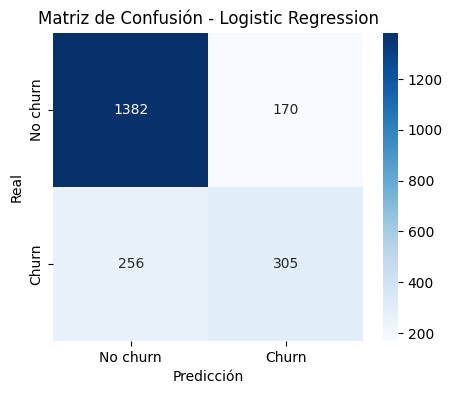


📌 Modelo: KNN
              precision    recall  f1-score   support

    No churn       0.82      0.83      0.83      1552
       Churn       0.52      0.50      0.51       561

    accuracy                           0.74      2113
   macro avg       0.67      0.66      0.67      2113
weighted avg       0.74      0.74      0.74      2113



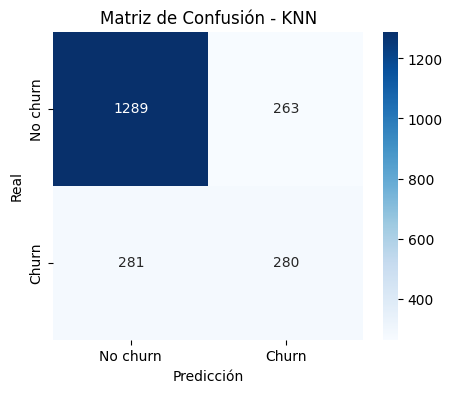


📌 Modelo: Random Forest
              precision    recall  f1-score   support

    No churn       0.83      0.89      0.86      1552
       Churn       0.61      0.49      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



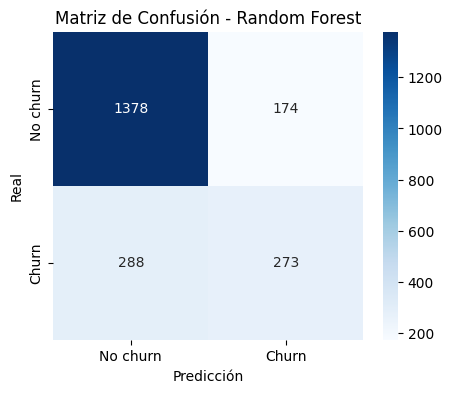

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[00:35:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





📌 Modelo: XGBoost
              precision    recall  f1-score   support

    No churn       0.84      0.87      0.86      1552
       Churn       0.60      0.55      0.58       561

    accuracy                           0.78      2113
   macro avg       0.72      0.71      0.72      2113
weighted avg       0.78      0.78      0.78      2113



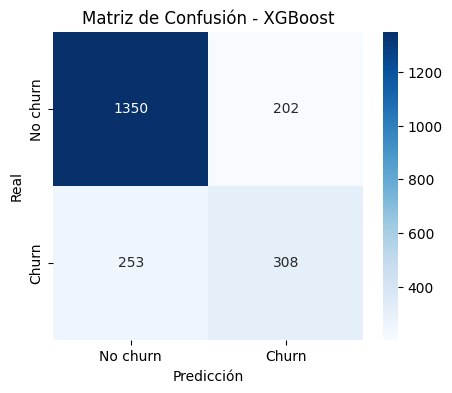


📊 Resultados comparativos:
                     Accuracy  Precision    Recall        F1
Logistic Regression  0.798391   0.642105  0.543672  0.588803
KNN                  0.742546   0.515654  0.499109  0.507246
Random Forest        0.781354   0.610738  0.486631  0.541667
XGBoost              0.784666   0.603922  0.549020  0.575163


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer




X = X_df_final.drop("Churn", axis=1)
y = X_df_final["Churn"]


cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore', drop="first"), cat_cols)
    ]
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Models
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# Entrenar y evaluar
resultados = {}

for nombre, modelo in modelos.items():

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', modelo)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    resultados[nombre] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}

    print(f"\n📌 Modelo: {nombre}")
    print(classification_report(y_test, y_pred, target_names=["No churn", "Churn"]))

    # Matriz de confusión
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No churn","Churn"], yticklabels=["No churn","Churn"])
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Resumen comparativo
print("\n📊 Resultados comparativos:")
resultados_df = pd.DataFrame(resultados).T
print(resultados_df)

##CONCLUSION

En terminos generales , el mejor modelo es **Regresion logistica** , que es el mas balanceado ( mayor accuracy (79.8%) , Mejor precision y F1-score , ademas de Buen compromiso entre recall y precision) e interpretable ,no muestra señales fuertes de overfitting ni underfitting.
El modelo XGBoost tiene un mejor recall (54.9%), y si nuestra prioridad es detectar la mayor cantidad de clientes que cancelan, este modelo seria el mas util.